<a href="https://colab.research.google.com/github/HariniMohan97/Session6/blob/master/Assignment_6B.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing requires packages
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D, SeparableConv2D, DepthwiseConv2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

In [0]:
#loading and splitting ciphare10 dataset
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_height =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

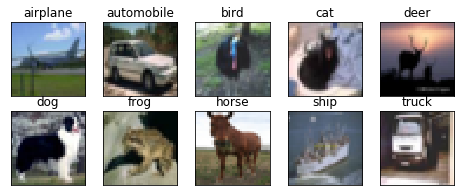

In [0]:
#plotting the first image from each class
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
#plotting the updated accuracy and loss graphs for train and test respectively with updations every epoch

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
#calculating accuracy of model
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

##Given below is the network provided to us that we had to work on as mentioned in Assignment 6A!

In [0]:
# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3))) #3
model.add(Activation('relu'))
model.add(Convolution2D(48, 3, 3)) #5
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #10
model.add(Dropout(0.25))
model.add(Convolution2D(96, 3, 3, border_mode='same')) #12
model.add(Activation('relu'))
model.add(Convolution2D(96, 3, 3)) #14
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #28
model.add(Dropout(0.25))
model.add(Convolution2D(192, 3, 3, border_mode='same')) #30
model.add(Activation('relu'))
model.add(Convolution2D(192, 3, 3)) #32
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) #64
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


W0827 07:39:48.091003 140121561790336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0827 07:39:48.131725 140121561790336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0827 07:39:48.138332 140121561790336 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 48)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 96)        41568     
__________

Epoch 1/100
  5/390 [..............................] - ETA: 12s - loss: 1.4499 - acc: 0.4562

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=100)`
  if sys.path[0] == '':


390/390 [==============================] - 9s 22ms/step - loss: 1.2714 - acc: 0.5434 - val_loss: 1.0466 - val_acc: 0.6283
Epoch 2/100
390/390 [==============================] - 9s 22ms/step - loss: 1.0744 - acc: 0.6226 - val_loss: 0.9332 - val_acc: 0.6719
Epoch 3/100
390/390 [==============================] - 8s 22ms/step - loss: 0.9484 - acc: 0.6700 - val_loss: 0.8238 - val_acc: 0.7165
Epoch 4/100
390/390 [==============================] - 9s 22ms/step - loss: 0.8583 - acc: 0.7043 - val_loss: 0.7556 - val_acc: 0.7368
Epoch 5/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7869 - acc: 0.7308 - val_loss: 0.7167 - val_acc: 0.7564
Epoch 6/100
390/390 [==============================] - 9s 23ms/step - loss: 0.7294 - acc: 0.7515 - val_loss: 0.7336 - val_acc: 0.7522
Epoch 7/100
390/390 [==============================] - 9s 23ms/step - loss: 0.6914 - acc: 0.7639 - val_loss: 0.6903 - val_acc: 0.7705
Epoch 8/100
390/390 [==============================] - 9s 22ms/step - loss

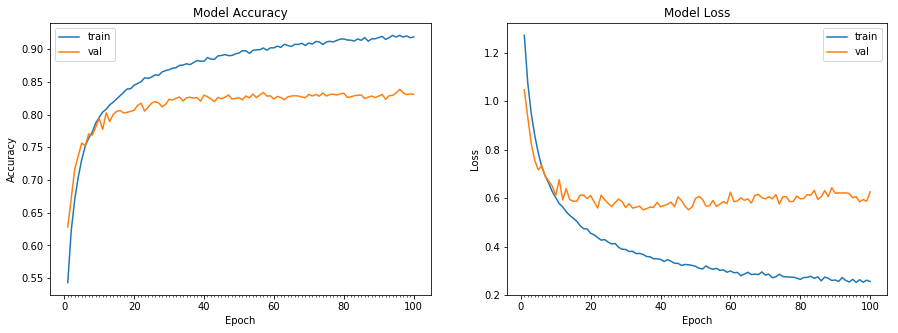

Accuracy on test data is: 83.11


In [0]:
from keras.preprocessing.image import ImageDataGenerator

#datagen does the respective actions on the data fit into it
datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)


# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

#In this assignment we need to rewrite it again using these convolutions in the order given below:
-Normal Convolution

-Spatially Separable Convolution  (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))

-Depthwise Separable Convolution

-Grouped Convolution (use 3x3, 5x5 only)

-Grouped Convolution (use 3x3 only, one with dilation = 1, and another with dilation = 2) 

-You must use all of the 5 above at least once

-Train this new model for 50 epochs. 

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Model, Sequential
from keras.layers import Dense, Dropout, Flatten, Input, AveragePooling2D, merge, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Concatenate
from keras.optimizers import Adam
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import Reshape, Activation, Conv2D, Input, MaxPooling2D, BatchNormalization, Flatten, Dense, Lambda, SeparableConv2D, GlobalAveragePooling2D, Add
from keras.layers.merge import concatenate

##I have used functional api method to implement the requirements. It's easier to add/concatenate the output of two layers with this method

In [0]:
input = Input(shape=(img_channels, img_rows, img_height))
# Define the model
#Normal Convolution
Layer1 = Conv2D(8, (3,3),padding = 'same', strides = (1,1))(input) 
Layer1=BatchNormalization()(Layer1)
Layer1=Activation('relu')(Layer1)
Layer1=Dropout(0.25)(Layer1)


#Spatially Separable Convolution (Conv2d(x, (3,1)) followed by Conv2D(x,(3,1))
Layer2 = Conv2D(8, (3,1), strides = (1,1))(Layer1) 
Layer2=Activation('relu')(Layer2)
Layer2 = Conv2D(8, (1,3), strides = (1,1))(Layer2) 
Layer2=BatchNormalization()(Layer2)
Layer2=Activation('relu')(Layer2)
Layer2=Dropout(0.25)(Layer2)

#Depthwise Separable Convolution
Layer3 = SeparableConv2D(16, (3,3),padding = 'same', strides = (1,1), depth_multiplier = 1)(Layer2) 
Layer3=BatchNormalization()(Layer3)
Layer3=Activation('relu')(Layer3)
Layer3=Dropout(0.25)(Layer3)


#Grouped Convolution (use 3x3, 5x5 only)
x = Conv2D(16, (3,3),padding = 'same', strides = (1,1))(Layer3)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.25)(x)
y = Conv2D(16, (5,5),padding = 'same', strides = (1,1))(Layer3)
y=BatchNormalization()(y)
y=Activation('relu')(y)
y=Dropout(0.25)(y)
Layer4 = concatenate([x,y]) #concatenates the 2 outputs

#Grouped Convolution  (use 3x3 only, one with dilation = 1, and another with dilation = 2)
x = Conv2D(32, (3,3),padding = 'same', strides = (1,1),dilation_rate = 1)(Layer4)
x=BatchNormalization()(x)
x=Activation('relu')(x)
x=Dropout(0.25)(x)
y = Conv2D(32, (3,3),padding = 'same', strides = (1,1),dilation_rate = 2)(Layer4)
y=BatchNormalization()(y)
y=Activation('relu')(y)
y=Dropout(0.25)(y)
Layer5 = concatenate([x,y])

Layer5 = Activation('softmax') (Layer5)

Layer6 = Conv2D(10, (1,1), strides=(1,1), padding='same', use_bias=False)(Layer5)



Layer7 = GlobalAveragePooling2D()(Layer6)

output = (Layer7)





In [0]:
model = Model(inputs=[input], outputs=[output])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_12 (InputLayer)           (None, 32, 32, 3)    0                                            
__________________________________________________________________________________________________
conv2d_69 (Conv2D)              (None, 32, 32, 8)    224         input_12[0][0]                   
__________________________________________________________________________________________________
batch_normalization_60 (BatchNo (None, 32, 32, 8)    32          conv2d_69[0][0]                  
__________________________________________________________________________________________________
activation_71 (Activation)      (None, 32, 32, 8)    0           batch_normalization_60[0][0]     
____________________________________________________________________________________________

##Sudden change in val loss observed in 19th epoch post which val acc stuck at 10% .
##Same with training loss and accuracy.
##Hit 12.58 val acc at 17th epoch.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., validation_data=(array([[[..., verbose=1, steps_per_epoch=390, epochs=50)`
  


Epoch 1/50
390/390 [==============================] - 21s 53ms/step - loss: 8.0336 - acc: 0.1036 - val_loss: 7.9788 - val_acc: 0.1036
Epoch 2/50
390/390 [==============================] - 17s 44ms/step - loss: 7.8919 - acc: 0.1026 - val_loss: 8.1319 - val_acc: 0.1039
Epoch 3/50
390/390 [==============================] - 17s 44ms/step - loss: 7.1679 - acc: 0.0844 - val_loss: 6.8614 - val_acc: 0.0759
Epoch 4/50
390/390 [==============================] - 17s 44ms/step - loss: 8.6714 - acc: 0.0923 - val_loss: 9.6908 - val_acc: 0.1013
Epoch 5/50
390/390 [==============================] - 17s 44ms/step - loss: 9.3667 - acc: 0.1037 - val_loss: 9.6865 - val_acc: 0.1022
Epoch 6/50
390/390 [==============================] - 17s 44ms/step - loss: 9.4622 - acc: 0.1052 - val_loss: 9.6332 - val_acc: 0.1022
Epoch 7/50
390/390 [==============================] - 17s 44ms/step - loss: 8.7467 - acc: 0.1061 - val_loss: 9.7164 - val_acc: 0.1018
Epoch 8/50
390/390 [==============================] - 17s 44ms

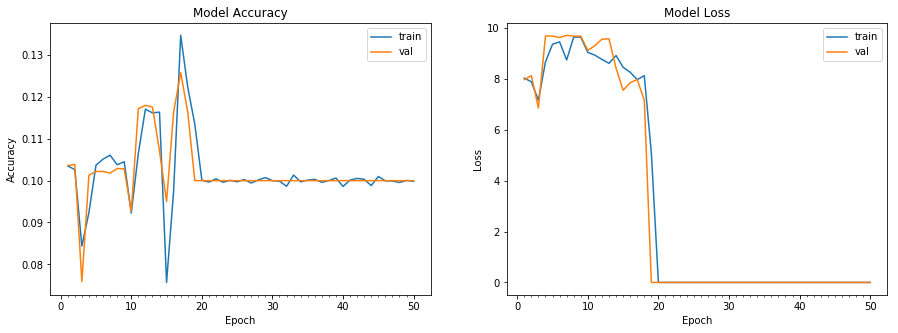

Accuracy on test data is: 10.00


In [0]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False)

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 50, 
                                 validation_data = (test_features, test_labels), verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

